In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


In [2]:
COLUMNS = ["age", "workclass", "fnlwgt", "education",  "education_num", "marital_status", "occupation", "relationship", "race", 
"gender", "capital_gain", "capital_loss", "hours_per_week",  "native_country", "income"]

CATEGORICAL_COLUMNS = ["workclass", "education", "marital_status", "occupation", "relationship", "race", "gender", 
                       "native_country"]
CONTINUOUS_COLUMNS = ["age", "education_num", "capital_gain", "capital_loss", "hours_per_week"]

In [3]:
df_train = pd.read_csv("adult-training.csv",names = COLUMNS,)

df_test = pd.read_csv("adult-test.csv",names = COLUMNS,)

In [4]:
# make 1 master csv file from test and train
df_master = pd.concat([df_test, df_train], axis=0)
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 32560
Data columns (total 15 columns):
age               48842 non-null int64
workclass         48842 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education_num     48842 non-null int64
marital_status    48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
gender            48842 non-null object
capital_gain      48842 non-null int64
capital_loss      48842 non-null int64
hours_per_week    48842 non-null int64
native_country    48842 non-null object
income            48842 non-null object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [5]:
df_master['income'].value_counts()


 <=50K     24720
 <=50K.    12435
 >50K       7841
 >50K.      3846
Name: income, dtype: int64

In [6]:
# Change income bracket values that have a . at end and remove space 
df_master = df_master.replace(to_replace=(' >50K.', ' >50K'),value='>50K')
df_master = df_master.replace(to_replace=(' <=50K.', ' <=50K'),value='<=50K')

In [7]:
# make 1 for >50k and 0 for <=50K in income column
df_master['income'] = df_master['income'].apply(lambda x: 1 if x=='>50K' else 0)

In [8]:
df_master.education.unique()

array([' 11th', ' HS-grad', ' Assoc-acdm', ' Some-college', ' 10th',
       ' Prof-school', ' 7th-8th', ' Bachelors', ' Masters', ' Doctorate',
       ' 5th-6th', ' Assoc-voc', ' 9th', ' 12th', ' 1st-4th',
       ' Preschool'], dtype=object)

In [9]:
# Make all education values that didnt graduate HS 'No Diploma'
# the 2 associate values to Associates
# some college and HS-grad to Diploma
df_master = df_master.replace(to_replace=(' 1st-4th', ' 5th-6th',' 7th-8th',' 9th', ' 10th', ' 11th', ' 12th', ' Preschool'),value=' No Diploma')
df_master = df_master.replace(to_replace=(' Assoc-acdm', ' Assoc-voc'),value=' Associates')
df_master = df_master.replace(to_replace=(' Some-college', ' HS-grad'),value=' Diploma')

df_master['education'] = df_master['education'].str.strip()

In [10]:
# Put countries in their native region continent
df_master = df_master.replace(to_replace=(' United-States', ' Honduras', ' Mexico',' Puerto-Rico',' Canada', ' Outlying-US(Guam-USVI-etc)', ' Nicaragua', ' Guatemala', ' El-Salvador' ),value='North America')
df_master = df_master.replace(to_replace=(' Cuba', ' Jamaica', ' Trinadad&Tobago', ' Haiti', ' Dominican-Republic' ),value='Caribbean')
df_master = df_master.replace(to_replace=(' South', ' Cambodia',' Thailand',' Laos', ' Taiwan', ' China', ' Japan', ' India', ' Iran', ' Philippines', ' Vietnam', ' Hong'),value='Asia')
df_master = df_master.replace(to_replace=(' England', ' Germany', ' Portugal', ' Italy', ' Poland', ' France', ' Yugoslavia',' Scotland', ' Greece', ' Ireland', ' Hungary', ' Holand-Netherlands'),value='Europe') 
df_master = df_master.replace(to_replace=(' Columbia', ' Ecuador', ' Peru'),value='South America')
df_master = df_master.replace(to_replace=(' ?'),value='Other')                                       

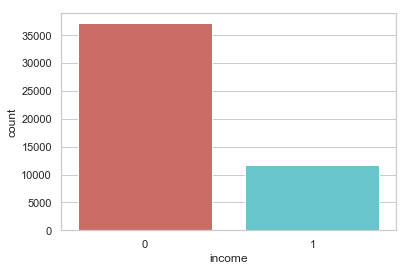

<Figure size 432x288 with 0 Axes>

In [11]:
sns.countplot(x = 'income', data = df_master, palette='hls')
plt.show()
plt.savefig('count plot')

In [12]:
df_master.groupby('income').mean()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
income,,,,,,
0,36.872184,190039.565523,9.598493,147.010308,54.151931,38.840048
1,44.275178,188470.574570,11.602807,4042.239497,193.528964,45.452896


In [13]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 32560
Data columns (total 15 columns):
age               48842 non-null int64
workclass         48842 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education_num     48842 non-null int64
marital_status    48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
gender            48842 non-null object
capital_gain      48842 non-null int64
capital_loss      48842 non-null int64
hours_per_week    48842 non-null int64
native_country    48842 non-null object
income            48842 non-null int64
dtypes: int64(7), object(8)
memory usage: 7.2+ MB


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [15]:
target = df_master['income'].values
features = df_master[['age', 'workclass', 'fnlwgt', 'education',  'education_num', 'marital_status', 'occupation', 'relationship', 'race', 
"gender", 'capital_gain', 'capital_loss', 'hours_per_week',  'native_country',]].copy()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=0)

In [17]:
preprocess = make_column_transformer(
    (['age', 'fnlwgt', 'education_num','capital_gain', 'capital_loss', 'hours_per_week'] ,make_pipeline(SimpleImputer(), StandardScaler())),
    (['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'gender', 'native_country'], OneHotEncoder()))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:739: DeprecationWarning: `make_column_transformer` now expects (transformer, columns) as input tuples instead of (columns, transformer). This has been introduced in v0.20.1. `make_column_transformer` will stop accepting the deprecated (columns, transformer) order in v0.22.
  warnings.warn(message, DeprecationWarning)


In [18]:
model = make_pipeline(
    preprocess,
    LogisticRegression(solver='liblinear'))

In [19]:
model.fit(X_train, y_train)
print("logistic regression score: %f" % model.score(X_test, y_test))

logistic regression score: 0.851773
